# Name :- Varun Biren Majithia

# Student ID :- 8894799

## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import svm

## Importing data to the notebook

In [2]:
df = pd.read_csv("C://Users//Admin//Downloads//heart.csv")
df.head(n=5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Getting the info of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Checking 5 summary statistics

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Visualizing the dependent variable

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

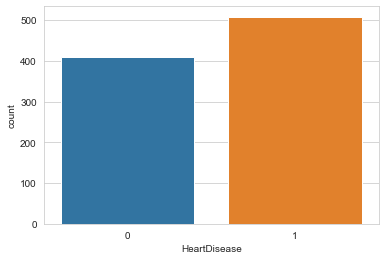

In [5]:
sns.set_style("whitegrid")
sns.countplot(x = "HeartDisease",data = df)

## Visualizing the distribution of age

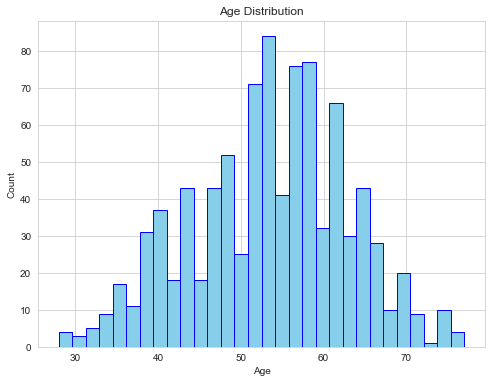

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

##### From the above visualization we can see that age follows a near normal distribution

## Visualizing the categorical variable gender

<AxesSubplot: xlabel='Sex', ylabel='count'>

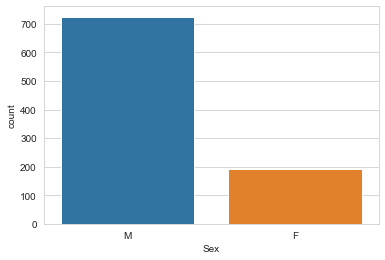

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Sex",data = df)

##### From the above plot we can see that the data consists higher number of observaltions of males

## Countplot of resting ecg to heart disease

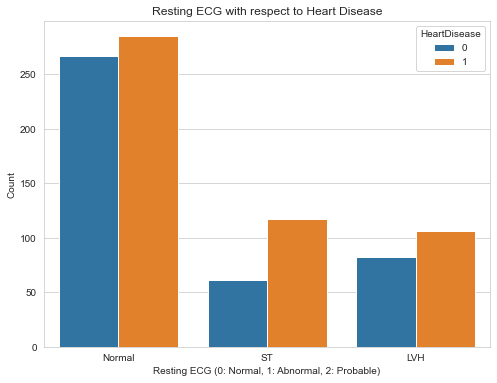

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
plt.xlabel('Resting ECG (0: Normal, 1: Abnormal, 2: Probable)')
plt.ylabel('Count')
plt.title('Resting ECG with respect to Heart Disease')
plt.show()

## Countplot of Chest pain type to heart disease

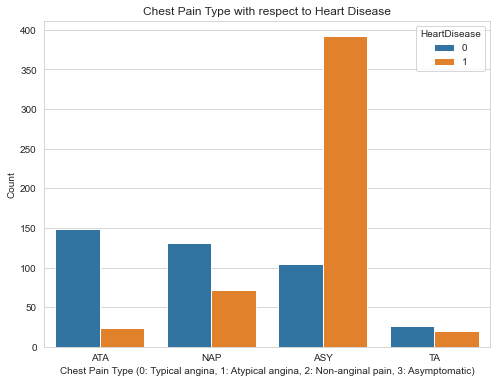

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.xlabel('Chest Pain Type (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)')
plt.ylabel('Count')
plt.title('Chest Pain Type with respect to Heart Disease')
plt.show()

##### The ASY Pain type has highest count having heart disease

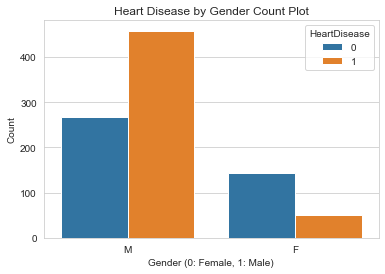

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Heart Disease by Gender Count Plot')
plt.show()

##### From the above plot we can see that there are more instances of males getting a heart attack 

## Removing Outliers using Zscore with a threshold of 3

In [11]:
import pandas as pd
from scipy import stats

# Getting only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Calculating Z-scores for each numeric column
z_scores = stats.zscore(numeric_columns)

# Finding rows with Z-score greater than 3 or less than -3
outlier_rows = (abs(z_scores) > 3).any(axis=1) | (abs(z_scores) < -3).any(axis=1)

# Removing outlier rows from the DataFrame in place
df = df[~outlier_rows]

## Converting the catergorical string variables to numerical using Label Encoder

## Label Encoder 

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df["Sex"])
df["ChestPainType"] = encoder.fit_transform(df["ChestPainType"])
df["RestingECG"] = encoder.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = encoder.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = encoder.fit_transform(df["ST_Slope"])

In [13]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,0.789766,0.785317,132.027809,198.005562,0.232481,0.991101,136.917686,0.403782,0.861513,1.373749,0.547275
std,9.456073,0.407701,0.956496,17.120895,107.157779,0.422649,0.629569,25.356740,0.490928,1.007626,0.601057,0.498037
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,174.500000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,222.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000


In [14]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,0.789766,0.785317,132.027809,198.005562,0.232481,0.991101,136.917686,0.403782,0.861513,1.373749,0.547275
std,9.456073,0.407701,0.956496,17.120895,107.157779,0.422649,0.629569,25.356740,0.490928,1.007626,0.601057,0.498037
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,174.500000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,222.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000


## Correlation Analysis

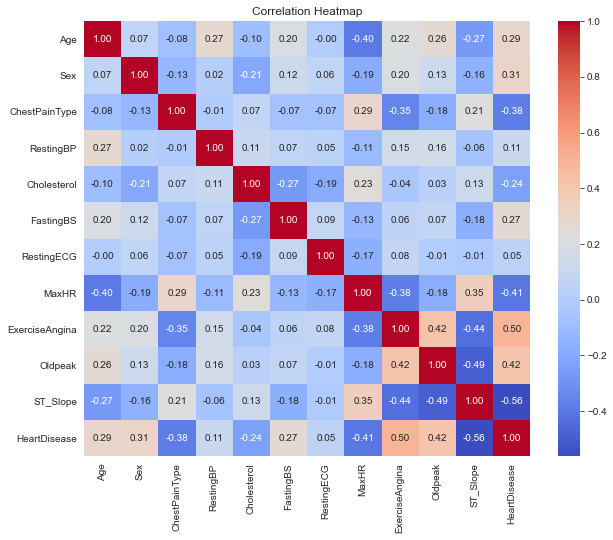

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Correlation of every independent variable over the target variable

In [16]:
df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']].corr()['HeartDisease']

Age               0.286672
Sex               0.309505
ChestPainType    -0.381915
RestingBP         0.110266
Cholesterol      -0.239056
FastingBS         0.267794
RestingECG        0.054617
MaxHR            -0.406112
ExerciseAngina    0.497990
Oldpeak           0.419697
ST_Slope         -0.561294
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

## My Inferences on the above confusion Matrix

##### From the above confusion matrix we can observe that RestingECG has the highest correlation with the target feature HeartDisease followed by ExerciseAngina, Oldpeak, Sex , Age , FastingBS, RestingBP

## Splitting into independent and dependent variables

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Data Preprocessing using Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [19]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.428154,0.515943,0.224572,0.465900,0.849636,-0.550362,0.014143,1.384320,-0.822945,-0.855469,1.042496
1,-0.475855,-1.938199,1.270637,1.634714,-0.168122,-0.550362,0.014143,0.752973,-0.822945,0.137516,-0.622165
2,-1.745588,0.515943,0.224572,-0.118507,0.793612,-0.550362,1.603415,-1.535661,-0.822945,-0.855469,1.042496
3,-0.581666,-1.938199,-0.821492,0.349019,0.149344,-0.550362,0.014143,-1.141069,1.215148,0.634008,-0.622165
4,0.053200,0.515943,1.270637,1.050307,-0.028064,-0.550362,0.014143,-0.588640,-0.822945,-0.855469,1.042496
...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,0.515943,2.316702,-1.287320,0.616205,-0.550362,0.014143,-0.194048,-0.822945,0.336112,-0.622165
895,1.534554,0.515943,-0.821492,0.699663,-0.046738,1.816985,0.014143,0.161085,-0.822945,2.520678,-0.622165
896,0.370633,0.515943,-0.821492,-0.118507,-0.625646,-0.550362,0.014143,-0.864854,1.215148,0.336112,-0.622165
897,0.370633,-1.938199,0.224572,-0.118507,0.354763,-0.550362,-1.575130,1.463238,-0.822945,-0.855469,-0.622165


In [20]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

## Splitting into train and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, random_state=16)

## Fitting Standalone Support Vector Machine Model

In [22]:
svm_model1 = svm.SVC(kernel='linear')
svm_model1.fit(X_train, y_train)

SVC(kernel='linear')

## Predicting the unseen data using standalone svm classifier

In [23]:
y_pred_svm_model1 = svm_model1.predict(X_test)
y_pred_svm_model1

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

## Performing Cross Validation on SVM (standalone with 10 folds) using accuracy as scoring parameter

In [24]:
scores_standalone_svm = cross_val_score(svm_model1, X_train, y_train, cv=10, scoring='accuracy')
scores_standalone_svm

array([0.81944444, 0.83333333, 0.84722222, 0.84722222, 0.875     ,
       0.88888889, 0.90277778, 0.88888889, 0.81944444, 0.78873239])

In [25]:
print('The mean score of standalone SVM is', scores_standalone_svm.mean())

The mean score of standalone SVM is 0.851095461658842


## Confusion Matrix

Confusion Matrix:


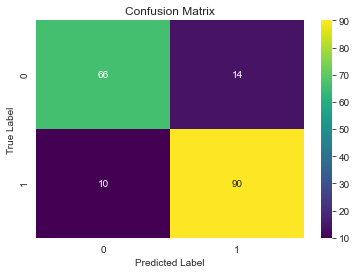

In [26]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_svm_standalone = confusion_matrix(y_test, y_pred_svm_model1)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_svm_standalone, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report (Precision,Recall, Accuarcy, and F1 Score)

In [27]:
precision_svm1 = precision_score(y_test, y_pred_svm_model1)
recall_svm1 = recall_score(y_test, y_pred_svm_model1)
f1_score_svm1 = f1_score(y_test, y_pred_svm_model1)
accuracy_svm1 = accuracy_score(y_test,y_pred_svm_model1)

print('Accuracy:', accuracy_svm1)
print('Precision:', precision_svm1)
print('Recall:', recall_svm1)
print('F1 Score:', f1_score_svm1)

Accuracy: 0.8666666666666667
Precision: 0.8653846153846154
Recall: 0.9
F1 Score: 0.8823529411764707


## Building the SVM (Bagging Model)

In [28]:
# Bagging SVM model
from sklearn.ensemble import BaggingClassifier
bagging_svm_model = BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=16)
bagging_svm_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=16)

## Predicting the unseen data using the svm bagging model

In [29]:
y_pred_svm_bagging = bagging_svm_model.predict(X_test)

## Performing Cross Validation on SVM Bagging Model on 10 folds

In [30]:
scores_bagging_svm = cross_val_score(bagging_svm_model, X_train, y_train, cv=10, scoring='accuracy')
scores_bagging_svm

array([0.80555556, 0.86111111, 0.86111111, 0.86111111, 0.84722222,
       0.875     , 0.93055556, 0.88888889, 0.83333333, 0.78873239])

In [31]:
print("The average accuracy of bagging_svm model is",scores_bagging_svm.mean())

The average accuracy of bagging_svm model is 0.8552621283255087


Confusion Matrix:


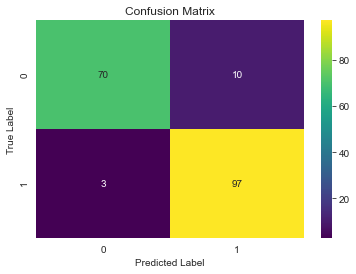

In [32]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_svm_bagging = confusion_matrix(y_test, y_pred_svm_bagging)
cf_svm_bagging

plt.figure(figsize=(6, 4))
sns.heatmap(cf_svm_bagging, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
cf_svm_bagging

array([[70, 10],
       [ 3, 97]], dtype=int64)

In [34]:
precision_bagging_svm = precision_score(y_test, y_pred_svm_bagging)
recall_bagging_svm = recall_score(y_test, y_pred_svm_bagging)
f1_score_bagging_svm = f1_score(y_test, y_pred_svm_bagging)
accuracy_bagging_svm = accuracy_score(y_test,y_pred_svm_bagging)

print('Accuracy:', accuracy_bagging_svm)
print('Precision:', precision_bagging_svm)
print('Recall:', recall_bagging_svm)
print('F1 Score:', f1_score_bagging_svm)

Accuracy: 0.9277777777777778
Precision: 0.9065420560747663
Recall: 0.97
F1 Score: 0.9371980676328503


## My Inferences on Bagging Vs Standalone SVM Model

<b>Accuracy:</b>

Standalone SVM: 0.867
Bagging SVM: 0.928

Bagging SVM achieved higher accuracy compared to Standalone SVM. Bagging helps improve the model's generalization by reducing overfitting.

<b>Precision:</b>

Standalone SVM: 0.865
Bagging SVM: 0.907

Bagging SVM also outperformed Standalone SVM in terms of precision. Higher precision indicates that the Bagging SVM has a better ability to correctly identify true positive instances among all predicted positive instances.

<b>Recall:</b>

Standalone SVM: 0.900
Bagging SVM: 0.970

Bagging SVM has a significantly higher recall compared to Standalone SVM. This indicates that Bagging SVM can better identify true positive instances among all actual positive instances.

<b>F1 Score:</b>

Standalone SVM: 0.882
Bagging SVM: 0.937

<b>Confusion Matrix:</b>

Standalone
[[66, 14],
 [10, 90]]
 
Bagging
[[70, 10],
 [3, 97]]
 
With fewer false positives and false negatives, the confusion matrix of the Bagging SVM shows a better balance between true positive and true negative predictions.



Overall, all evaluation metrics show that the Bagging SVM performs better than the Standalone SVM, proving that the bagging method significantly enhanced the model's performance. The bagging method aids in lowering variance and enhancing generalization, which produces better outcomes.

## Decision Trees

## Standalone Decision Tree

In [35]:
# Standalone Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predicting unseen data using Standalone decision tree

In [36]:
y_pred_dt = dt_model.predict(X_test)

In [37]:
y_pred_dt

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

## Confusion Matrix

Confusion Matrix:


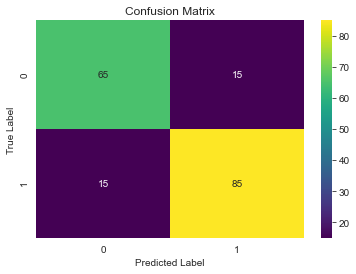

In [38]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_dt = confusion_matrix(y_test, y_pred_dt)
cf_dt

plt.figure(figsize=(6, 4))
sns.heatmap(cf_dt, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [39]:
precision_dt = precision_score(y_test,y_pred_dt)
recall_dt = recall_score(y_test,y_pred_dt)
f1_score_dt = f1_score(y_test,y_pred_dt)
accuracy_dt = accuracy_score(y_test,y_pred_dt)

print('Accuracy:', accuracy_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1 Score:', f1_score_dt)

Accuracy: 0.8333333333333334
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


In [40]:
cf_dt

array([[65, 15],
       [15, 85]], dtype=int64)

## Performing Cross Validation on Standalone Decision Tree Model

In [41]:
scores_dt = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')
scores_dt

array([0.72222222, 0.80555556, 0.69444444, 0.80555556, 0.80555556,
       0.81944444, 0.84722222, 0.76388889, 0.81944444, 0.67605634])

In [42]:
print("The average accuracy of the Standalone decision tree model is",scores_dt.mean())

The average accuracy of the Standalone decision tree model is 0.7759389671361503


## Bagging Decision Tree

In [43]:
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
bagging_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

## Predicting Unseen Data using Bagging Decsion Tree Model

In [44]:
y_pred_bagging_dt = bagging_dt.predict(X_test)
y_pred_bagging_dt

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

## Confusion Matrix

Confusion Matrix:


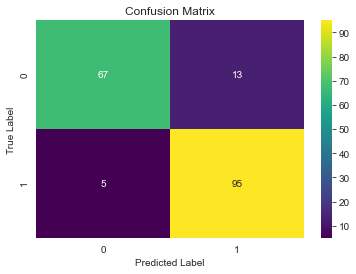

In [45]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_dt_bagging = confusion_matrix(y_test, y_pred_bagging_dt)
cf_dt_bagging

plt.figure(figsize=(6, 4))
sns.heatmap(cf_dt_bagging, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
cf_dt_bagging

array([[67, 13],
       [ 5, 95]], dtype=int64)

# Classification Report (Accuracy, Precision, Recall, F1 Score)

In [47]:
precision_dt_bagging = precision_score(y_test,y_pred_bagging_dt)
recall_dt_bagging = recall_score(y_test,y_pred_bagging_dt)
f1_score_dt_bagging = f1_score(y_test,y_pred_bagging_dt)
accuracy_dt_bagging = accuracy_score(y_test,y_pred_bagging_dt)

print('Accuracy:', accuracy_dt_bagging)
print('Precision:', precision_dt_bagging)
print('Recall:', recall_dt_bagging)
print('F1 Score:', f1_score_dt_bagging)

Accuracy: 0.9
Precision: 0.8796296296296297
Recall: 0.95
F1 Score: 0.9134615384615385


## Cross Validation

In [48]:
scores_dt_bagging = cross_val_score(bagging_dt, X_train, y_train, cv=10, scoring='accuracy')
scores_dt_bagging

array([0.75      , 0.90277778, 0.86111111, 0.80555556, 0.84722222,
       0.88888889, 0.875     , 0.86111111, 0.875     , 0.8028169 ])

In [49]:
print("The mean cross validation accuarcy of Bagged Decision Tree Model is",scores_dt_bagging.mean())

The mean cross validation accuarcy of Bagged Decision Tree Model is 0.8469483568075118


## My Inferences on Decsion Tree Standalone vs Decision Tree Bagging Model

<b>Accuracy:</b>

Standalone Decision Tree: 0.833
Decision Tree with Bagging: 0.900

Decision Tree with Bagging has achieved higher accuracy compared to the Standalone Decision Tree. Bagging helps improve the model's generalization capability meaning the ability of the model to predict unseen data and also reduces overfitting.

<b>Precision:</b>

Standalone Decision Tree: 0.850
Decision Tree with Bagging: 0.880

Decision Tree with Bagging also outperformed the Standalone Decision Tree in terms of precision. Higher precision indicates that the Bagging approach has a better ability to correctly identify true positive instances among all predicted positive instances.

<b>Recall:</b>

Standalone Decision Tree: 0.850
Decision Tree with Bagging: 0.950

Decision Tree with Bagging has a significantly higher recall compared to the Standalone Decision Tree. This indicates that the Bagging approach can better identify true positive instances among all actual positive instances.

<b>F1 Score:</b>

Standalone Decision Tree: 0.850
Decision Tree with Bagging: 0.913
The F1 score considers both precision and recall. Decision Tree with Bagging achieved a higher F1 score, indicating a better balance between precision and recall and overall better performance.

<b> Confusion Matrix </b>

Standalone
[[65, 15],
 [15, 85]]

Bagging
[[67, 13],
 [5, 95]]
 
Higher True Positives (TP) and lower False Negatives (FN) have been achieved using the Decision Tree with Bagging, demonstrating improved sensitivity in recognizing positive instances.
Additionally, the True Negatives (TN) and False Positives (FP) of the Decision Tree with Bagging exhibited a small rise and a slight decrease, respectively, demonstrating improved specificity in recognizing negative samples.
In comparison to the Standalone Decision Tree, Decision Tree with Bagging performed better overall in terms of true positive and true negative predictions, leading to increased accuracy and resilience.


Decision Tree with Bagging outperforms the Standalone Decision Tree, demonstrating that the bagging strategy has significantly enhanced the model's performance.